### Objetivo: criar gráficos sobre o PIB e o nível de felicidade das regiões.

##### 1 - Importar pacotes

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2 - Pegar dados

In [32]:
      # Base de dados principal
df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/fe_binning.csv')

    # Base de dados geográficas
geo = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/country_region.csv')

    # Base GDP (PIB)
    
pib = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/fe_calculated.csv')

#### 3 - Binning - Separar happiness em bins: baixo, médio e alto

In [33]:
    # Descobrindo informações para separar os bins de forma mais organizada
df.describe()

    # Separando os bins
bin = pd.cut(df['happiness'], bins = [0,4.614304,6.279204,10], labels = ['baixo','médio','alto'])

#### 4 -  Binning - Criar uma coluna para os bins

In [34]:
df['happiness_group'] = bin

In [35]:
df

,country,happiness,happiness_group
0,Afghanistan,3.982855,baixo
1,Albania,4.606651,baixo
2,Argentina,6.697131,alto
3,Armenia,4.348320,baixo
4,Australia,7.309061,alto
...,...,...,...
138,Venezuela,5.568800,médio
139,Vietnam,5.076315,médio
140,Yemen,2.982674,baixo
141,Zambia,4.843164,médio


#### 5 -  Binning - Fazer o merge das 2 tabelas

In [36]:
df = pd.merge(df, geo, left_on = 'country', right_on = 'country', how = 'left')
df

,country,happiness,happiness_group,region
0,Afghanistan,3.982855,baixo,South Asia
1,Albania,4.606651,baixo,Europe & Central Asia
2,Argentina,6.697131,alto,Latin America & Caribbean
3,Armenia,4.348320,baixo,Europe & Central Asia
4,Australia,7.309061,alto,East Asia & Pacific
...,...,...,...,...
138,Venezuela,5.568800,médio,Latin America & Caribbean
139,Vietnam,5.076315,médio,East Asia & Pacific
140,Yemen,2.982674,baixo,Middle East & North Africa
141,Zambia,4.843164,médio,Sub-Saharan Africa


#### 6 - Checando se tem algum país com região vazia

In [37]:
    # Pegar a porcentagem de dados vazios de cada coluna
df.isnull().mean()
    
    # Pegar o data frame com informações vazias
df[df['region'].isnull()]
    
    # Obs.: não tem informações vazias

,country,happiness,happiness_group,region


#### 7 - Criar a coluna de PIB per capita

In [38]:
pib['pib_per_capita'] = round(pib['gdp_usd']/pib['population'],2)
pib

,country,gdp_usd,population,pib_per_capita
0,Afghanistan,1.936297e+10,37172386,520.90
1,Albania,1.505888e+10,2866376,5253.63
2,Argentina,5.184750e+11,44494502,11652.56
3,Armenia,1.243309e+10,2951776,4212.07
4,Australia,1.432200e+12,24992369,57305.49
...,...,...,...,...
125,Uruguay,5.959689e+10,3449299,17277.97
126,Uzbekistan,5.049992e+10,32955400,1532.37
127,Vietnam,2.449480e+11,95540395,2563.82
128,Zambia,2.672007e+10,17351822,1539.90


#### 8 - Colocar a coluna PIB per capita no data frame

In [39]:
    # Obs.: do data frame PIB, só quero a coluna pib_per_capita.
        # Então deixei no merge só a chave (country) e a coluna de interesse (pib_per_capita)

df = pd.merge(df, pib[['country','pib_per_capita']], left_on = 'country', right_on = 'country', how = 'left')

    # Checando se tem informações vazias

        # Número de itens vazios em cada coluna
df.isnull().sum()

        # Data frame com informações vazias
df[df['pib_per_capita'].isnull()]

        # Obs.: tem informações vazias

,country,happiness,happiness_group,region,pib_per_capita
35,Egypt,4.762538,médio,Middle East & North Africa,NaN
54,Iran,4.749956,médio,Middle East & North Africa,NaN
59,Ivory Coast,4.445039,baixo,Sub-Saharan Africa,NaN
73,"Macedonia, FYR",4.975590,médio,Europe & Central Asia,NaN
93,North Cyprus,5.842550,médio,Europe & Central Asia,NaN
96,Palestine,4.695239,médio,Middle East & North Africa,NaN
105,Russia,5.995539,médio,Europe & Central Asia,NaN
116,South Korea,5.780211,médio,East Asia & Pacific,NaN
117,South Sudan,4.070771,baixo,Sub-Saharan Africa,NaN
122,Syria,3.461913,baixo,Middle East & North Africa,NaN


#### 9 - Preencher as informações vazias da coluna pib_per_capita

In [40]:
    # com a mean imputation de pib_per_capita de acordo com region e happiness_group

df['pib_per_capita'] = df.groupby(by=['region','happiness_group'])['pib_per_capita'].transform(lambda x: x.fillna(x.mean()))

    # Conferindo se os valores vazios dessa coluna foram preenchidos
    
df[df['pib_per_capita'].isnull()]

,country,happiness,happiness_group,region,pib_per_capita


In [41]:
df

,country,happiness,happiness_group,region,pib_per_capita
0,Afghanistan,3.982855,baixo,South Asia,520.900000
1,Albania,4.606651,baixo,Europe & Central Asia,5253.630000
2,Argentina,6.697131,alto,Latin America & Caribbean,11652.560000
3,Armenia,4.348320,baixo,Europe & Central Asia,4212.070000
4,Australia,7.309061,alto,East Asia & Pacific,57305.490000
...,...,...,...,...,...
138,Venezuela,5.568800,médio,Latin America & Caribbean,5403.358889
139,Vietnam,5.076315,médio,East Asia & Pacific,2563.820000
140,Yemen,2.982674,baixo,Middle East & North Africa,5878.030000
141,Zambia,4.843164,médio,Sub-Saharan Africa,1539.900000


#### 10 - Criar uma tabela dinâmica com a média do PIB das regiões

In [42]:
mean_pib_region = df.pivot_table('pib_per_capita', index = 'region', aggfunc='mean')
mean_pib_region

,pib_per_capita
region,
East Asia & Pacific,20113.197500
Europe & Central Asia,26548.750133
Latin America & Caribbean,7762.023626
Middle East & North Africa,19205.085476
North America,54382.875000
South Asia,2028.027143
Sub-Saharan Africa,1663.745179


#### 11- Criar um gráfico com a média do PIB das regiões

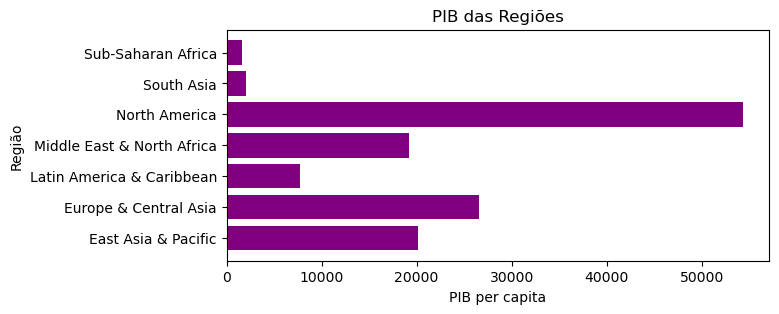

In [43]:
plt.figure(figsize=(7,3))
plt.barh(mean_pib_region.index, mean_pib_region.pib_per_capita, color = 'purple')
plt.xlabel('PIB per capita')
plt.ylabel('Região')
plt.title('PIB das Regiões')
plt.show()

#### 12 - Criar uma tabela dinâmica com a média do PIB das regiões e os níveis de felicidade

In [44]:
happy_region = df.pivot_table('pib_per_capita', index = 'region', columns = 'happiness_group', aggfunc='mean')
happy_region = happy_region.replace(np.nan, 0) # Substituir os np.nan por 0
happy_region

happiness_group,baixo,médio,alto
region,,,
East Asia & Pacific,1419.040000,9999.290000,43773.11250
Europe & Central Asia,4185.575000,12656.822222,58186.90875
Latin America & Caribbean,868.280000,5403.358889,11572.07250
Middle East & North Africa,5878.030000,12111.832857,41387.82400
North America,0.000000,0.000000,54382.87500
South Asia,2212.990000,1889.305000,0.00000
Sub-Saharan Africa,1264.532857,2683.954444,0.00000


#### 13- Criar um gráfico com a média do PIB das regiões e os níveis de felicidade

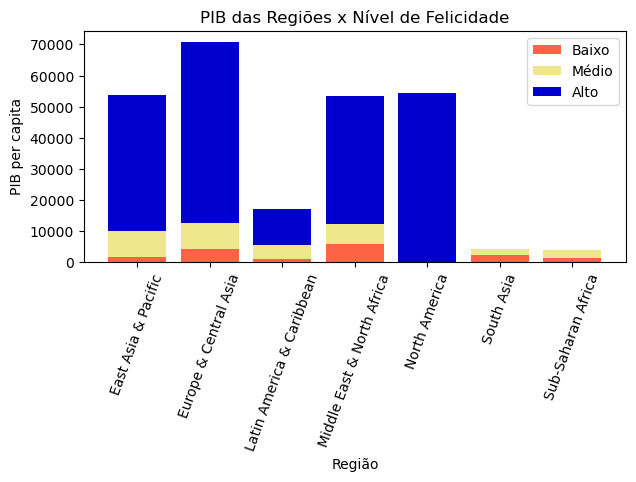

In [45]:
plt.figure(figsize=(7,3))
plt.xticks(rotation=70) # legenda do eixo x inclinada
plt.bar(happy_region.index, color='tomato', height = happy_region.baixo, label = 'Baixo') # happy_region.index é a lista de regiões
plt.bar(happy_region.index, bottom = happy_region.baixo, color='khaki', height = happy_region.médio, label = 'Médio')
plt.bar(happy_region.index, bottom = happy_region.médio, color='mediumblue', height = happy_region.alto, label = 'Alto')
plt.ylabel('PIB per capita')
plt.xlabel('Região')
plt.title('PIB das Regiões x Nível de Felicidade')
plt.legend() # legenda visível
plt.show()